In [1]:
from sklearn.datasets import load_digits

In [2]:
from numpy import *
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import *
from pandas import *
%matplotlib notebook

In [3]:
data=load_digits()

In [4]:
X,y=data.data,data.target==1

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
model=SVC(kernel='linear',C=1)
print(cross_val_score(model,X,y,cv=3))
print(cross_val_score(model,X,y,cv=3,scoring='roc_auc'))
print(cross_val_score(model,X,y,cv=3,scoring='recall'))

[0.94824708 0.97161937 0.95659432]
[0.98286951 0.99232129 0.98241819]
[0.86666667 0.8852459  0.80327869]


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
xn,xt,yn,yt=train_test_split(X,y,random_state=42)
model=SVC(kernel='rbf');grid_val={'gamma':[.001,.01,.1,1,10]}
grid_acc=GridSearchCV(model,param_grid=grid_val)
grid_acc.fit(xn,yn);grid_dec=grid_acc.decision_function(xt)
print(grid_acc.best_params_); print(grid_acc.best_score_)

grid_acc=GridSearchCV(model,param_grid=grid_val,scoring='roc_auc')
grid_acc.fit(xn,yn);grid_dec=grid_acc.decision_function(xt)
print(grid_acc.best_params_); print(grid_acc.best_score_);print(roc_auc_score(yt,grid_dec))



{'gamma': 0.001}
0.9977695167286246
{'gamma': 0.001}
0.9997988505747127
1.0


In [7]:
model=SVC(kernel='linear').fit(xn,yn)
for i in ['precision','recall','f1','roc_auc']:
    
    grid=GridSearchCV(model,param_grid={'gamma': [0.001,.01,.1]},scoring=i)
    grid.fit(xn,yn)
    print('best parameter {}'.format(grid.best_params_))
    print('best score for {} is {}'.format(i,grid.best_score_))
    

best parameter {'gamma': 0.001}
best score for precision is 0.8460301944172912
best parameter {'gamma': 0.001}
best score for recall is 0.8758620689655172
best parameter {'gamma': 0.001}
best score for f1 is 0.8588632872503841
best parameter {'gamma': 0.001}
best score for roc_auc is 0.987060857538036


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
cfl=SVC(kernel='linear',class_weight='balanced').fit(xn,yn)
test_s=cfl.decision_function(xt)

In [10]:
X=data.data; y=data.target
xn,xt,yn,yt=train_test_split(X,y,random_state=42)

<IPython.core.display.Javascript object>


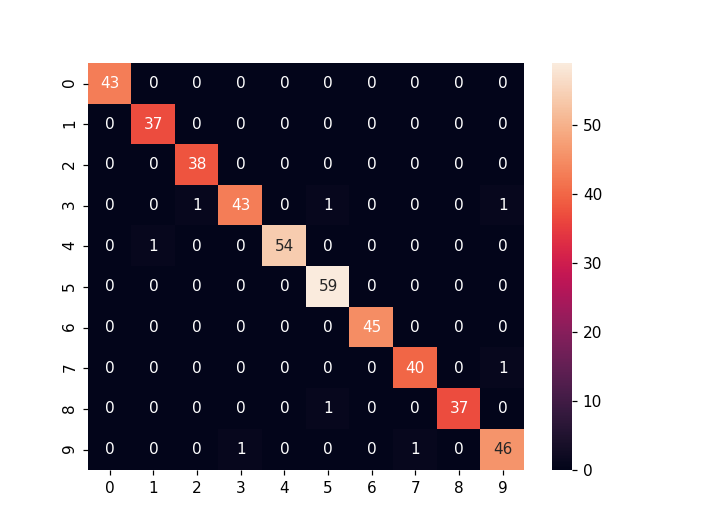

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.98      0.93      0.96        46
           4       1.00      0.98      0.99        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       1.00      0.97      0.99        38
           9       0.96      0.96      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



<IPython.core.display.Javascript object>


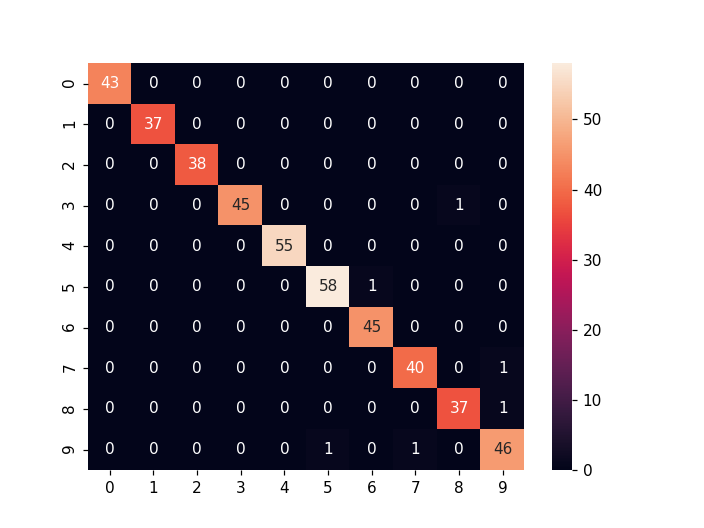

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      0.98      0.99        46
           4       1.00      1.00      1.00        55
           5       0.98      0.98      0.98        59
           6       0.98      1.00      0.99        45
           7       0.98      0.98      0.98        41
           8       0.97      0.97      0.97        38
           9       0.96      0.96      0.96        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [11]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from seaborn import *
svm_l=SVC(kernel='linear').fit(xn,yn)
pred_l=svm_l.predict(xt)
conf_l=confusion_matrix(yt,pred_l)
dt_l=DataFrame(conf_l)
figure()
heatmap(dt_l,annot=True)
print(classification_report(yt,pred_l))

svm_r=SVC(kernel='rbf').fit(xn,yn)
pred_r=svm_r.predict(xt)
conf_r=confusion_matrix(yt,pred_r)
dt_r=DataFrame(conf_r)
figure()
heatmap(dt_r,annot=True)
print(classification_report(yt,pred_r))

In [12]:
dt=read_csv('kyphosis.csv')
dt.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [13]:
X=dt.drop('Kyphosis',axis=1)
y=dt['Kyphosis']

In [14]:
xn,xt,yn,yt=train_test_split(X,y,random_state=42)

In [15]:
from sklearn.metrics import roc_auc_score 

<IPython.core.display.Javascript object>


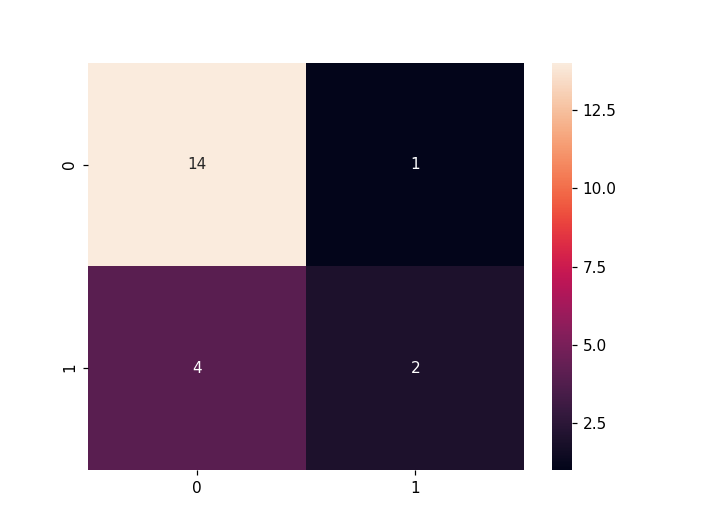

0.7619047619047619


In [16]:
svm1=SVC(kernel='linear').fit(xn,yn); pred1=svm1.predict(xt)
conf1=confusion_matrix(yt,pred1); dt1=DataFrame(conf1); figure(); heatmap(dt1,annot=True)
from sklearn.metrics import accuracy_score ;print(accuracy_score(yt,pred1));

<IPython.core.display.Javascript object>


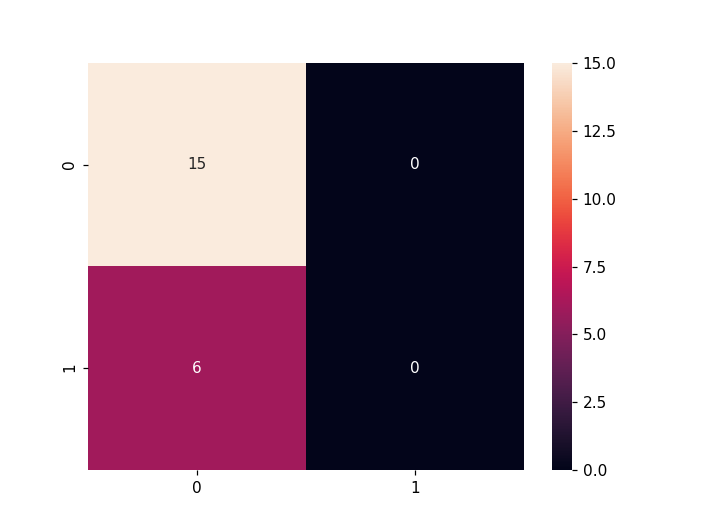

0.7142857142857143


In [17]:
svm1=SVC(kernel='rbf').fit(xn,yn); pred1=svm1.predict(xt)
conf1=confusion_matrix(yt,pred1); dt1=DataFrame(conf1); figure(); heatmap(dt1,annot=True)
from sklearn.metrics import accuracy_score ;print(accuracy_score(yt,pred1))